In [1]:
# How to generally estimate the number of independent resolution elements in a source?

In [5]:
from tractor import NCircularGaussianPSF, PixelizedPSF, PixelizedPsfEx, Image, Tractor, FluxesPhotoCal, NullWCS, ConstantSky, EllipseE, EllipseESoft, Fluxes, PixPos
from tractor.galaxy import ExpGalaxy, DevGalaxy, FixedCompositeGalaxy, SoftenedFracDev
from tractor.pointsource import PointSource
from tractor.psf import HybridPixelizedPSF

In [111]:
# fake an image
psfsize = 10 # pixels
imgscale = 0.15

arr = fits.getdata('/Users/jweaver/Projects/Current/Farmer_GalSim/data/intermediate/psfmodels/hsc_i.fits')
psf = PixelizedPSF(arr)


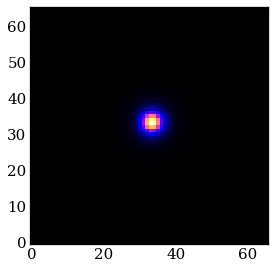

In [114]:
img = np.random.normal(size=(int(10/imgscale), int(10/imgscale)))
timg = Image(data=img,
                            invvar=np.ones_like(img),
                            psf=psf,
                            wcs=NullWCS(),
                            photocal=FluxesPhotoCal('band'),
                            sky=ConstantSky(0.),
                            name='band')

model = PointSource(PixPos(5/imgscale, 5/imgscale), Fluxes(band=1000))
tr = Tractor([timg,], [model,])
nimg = img + tr.getModelImage(0)
psfmodel = tr.getModelImage(0)

plt.imshow( tr.getModelImage(0))

timg = Image(data=nimg,
                            invvar=np.ones_like(img),
                            psf=psf,
                            wcs=NullWCS(),
                            photocal=FluxesPhotoCal('band'),
                            sky=ConstantSky(0.),
                            name='band')
tr = Tractor([timg,], [model,])

In [121]:
dx, dy = np.nonzero(psfmodel > np.max(psfmodel)/2.)
fwhm = np.mean([dx[-1] - dx[0], dy[-1] - dy[0]])
fwhm

2.5

<ipython-input-113-da3dd557e3b0>:3: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  plt.imshow(img.data-np.median(img.data), cmap='RdGy', norm=SymLogNorm(2, 1, vmin=-1*np.max(img.data), vmax=np.max(img.data)))


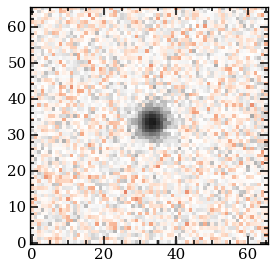

In [113]:
img = timg.getImage()
from matplotlib.colors import SymLogNorm
plt.imshow(img.data-np.median(img.data), cmap='RdGy', norm=SymLogNorm(2, 1, vmin=-1*np.max(img.data), vmax=np.max(img.data)))

In [ ]:
# size of segment / (pi * 2.5*std**2) -- nonparametric, but underestimates true size
# circ_Reff**2 / (2.5*std**2) > pi cancels -- parametric, so interdepends with chi2
# give both?! yes, but use segment for DT!
# point sources now have -ve DOF!